<a href="https://colab.research.google.com/github/pranav-Karthick/Weather-Forecast-temperature-prediction/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
file_path = "/content/daily_weather.csv"
df = pd.read_csv(file_path)

In [ ]:
df.columns = df.columns.str.strip().str.lower()

In [ ]:
print("Columns:", df.columns)

Columns: Index(['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am',
       'relative_humidity_3pm'],
      dtype='object')


In [ ]:
target = "air_temp_9am"   # Change if necessary

if target not in df.columns:
    raise ValueError("Target column not found. Run print(df.columns) and correct it.")

In [ ]:
numeric_df = df.select_dtypes(include=["int64", "float64"])


In [ ]:
numeric_df.fillna(numeric_df.mean(), inplace=True)


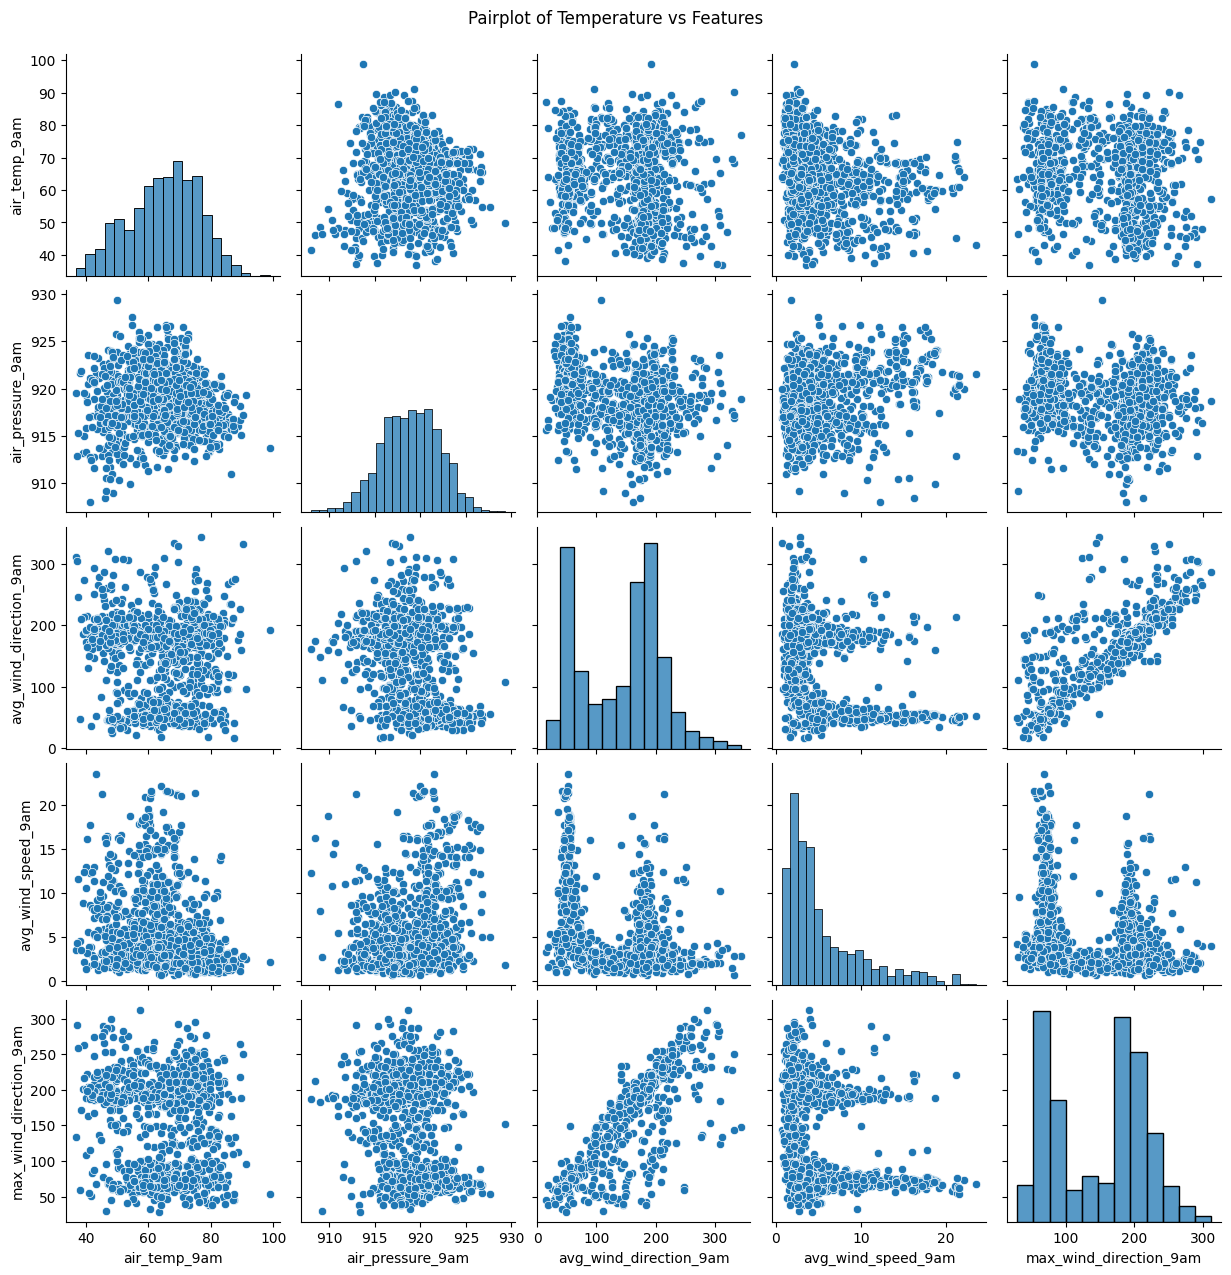

In [ ]:
sns.pairplot(numeric_df[[target] + list(numeric_df.columns.difference([target]))[:4]])
plt.suptitle("Pairplot of Temperature vs Features", y=1.02)
plt.show()

In [ ]:
X = numeric_df.drop(columns=[target])
y = numeric_df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)


In [ ]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

pr = LinearRegression()
pr.fit(X_train_poly, y_train)
pr_pred = pr.predict(X_test_poly)

In [ ]:
pr_mse = mean_squared_error(y_test, pr_pred)
pr_rmse = np.sqrt(pr_mse)
pr_r2 = r2_score(y_test, pr_pred)

In [ ]:
print("\nLinear Regression:")
print("MSE:", lr_mse)
print("RMSE:", lr_rmse)
print("R2 Score:", lr_r2)


Linear Regression:
MSE: 69.27805831572174
RMSE: 8.323344178617255
R2 Score: 0.470494870253081


In [ ]:
print("\nPolynomial Regression:")
print("MSE:", pr_mse)
print("RMSE:", pr_rmse)
print("R2 Score:", pr_r2)



Polynomial Regression:
MSE: 165.26915452404387
RMSE: 12.855705135232522
R2 Score: -0.26318299382184085


In [ ]:
comparison = pd.DataFrame({
    "Actual Temperature": y_test.values,
    "Linear Prediction": lr_pred,
    "Polynomial Prediction": pr_pred
})

print("\nSample Predictions:")
print(comparison.head(10))


Sample Predictions:
   Actual Temperature  Linear Prediction  Polynomial Prediction
0           76.550000          69.398697              70.017992
1           64.618269          69.182446              67.289119
2           69.388873          71.948744              71.572399
3           72.932000          76.654422              75.699041
4           78.530000          74.115057              73.336716
5           59.089350          57.493626              63.535081
6           82.664164          80.353227              85.247121
7           69.777717          67.311156              67.231683
8           55.040000          56.494918              57.354818
9           65.030000          62.242704              62.819985


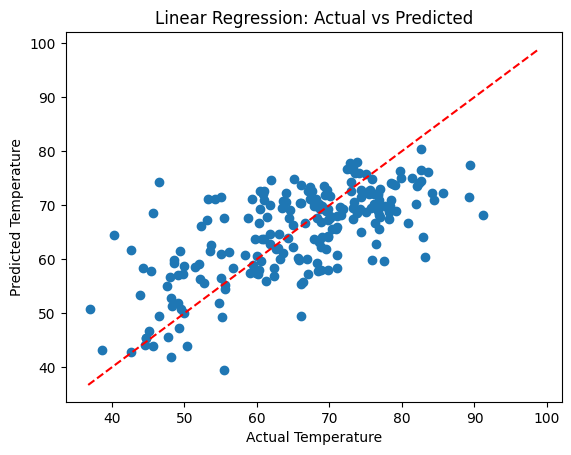

In [ ]:
plt.figure()
plt.scatter(y_test, lr_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

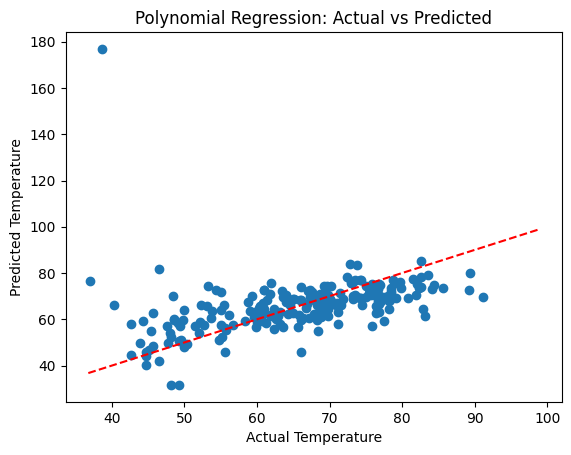

In [ ]:
plt.figure()
plt.scatter(y_test, pr_pred)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [ ]:
if pr_r2 > lr_r2:
    print("\nPolynomial Regression performs better.")
else:
    print("\nLinear Regression performs better.")


Linear Regression performs better.
